In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns',None)

In [2]:
data=pd.read_csv('Train.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
data.shape

(8523, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [6]:
data.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [7]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df= data.copy()

# EDA

In [9]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

It seems the Low Fat and Regular category repeatetd as LF, low fat, reg. So we combining them as in original category.

In [10]:
df['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
df['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)
df['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [11]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [12]:
df.groupby(['Item_Fat_Content'])['Item_Outlet_Sales'].sum()

Item_Fat_Content
Low Fat    1.190409e+07
Regular    6.687031e+06
Name: Item_Outlet_Sales, dtype: float64

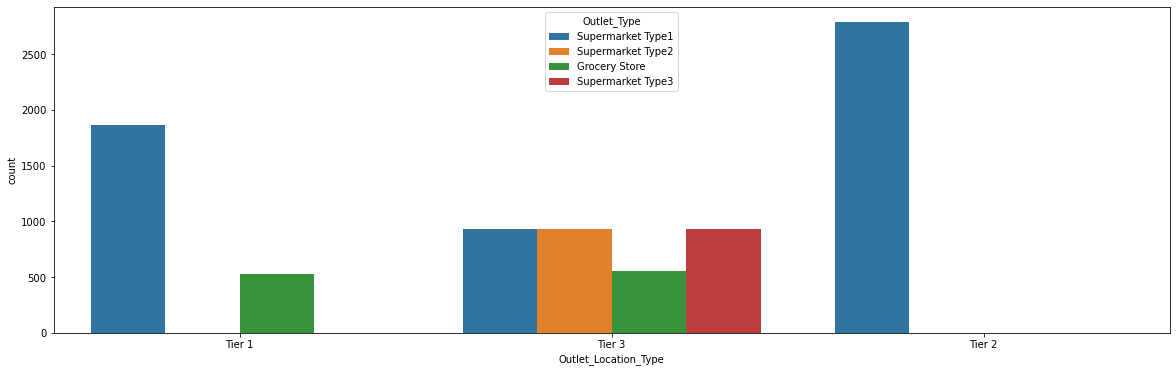

In [13]:
plt.figure(figsize=(20,6))
sns.countplot(df['Outlet_Location_Type'],hue=df['Outlet_Type'])

From above graph we can conclude that may be Tier3 outlet is urban area whereas tier 1 may be sub urban and tier 2 will be village area as no. of outlets are only one

In [14]:
df.groupby(['Outlet_Location_Type'])['Item_Outlet_Sales'].sum()

Outlet_Location_Type
Tier 1    4.482059e+06
Tier 2    6.472314e+06
Tier 3    7.636753e+06
Name: Item_Outlet_Sales, dtype: float64

From sales we can definetly say that Tier 3 has highest sales as it is Urban area, followed by sub urban area i.e. tier 2 and village are i.e. Tier 3

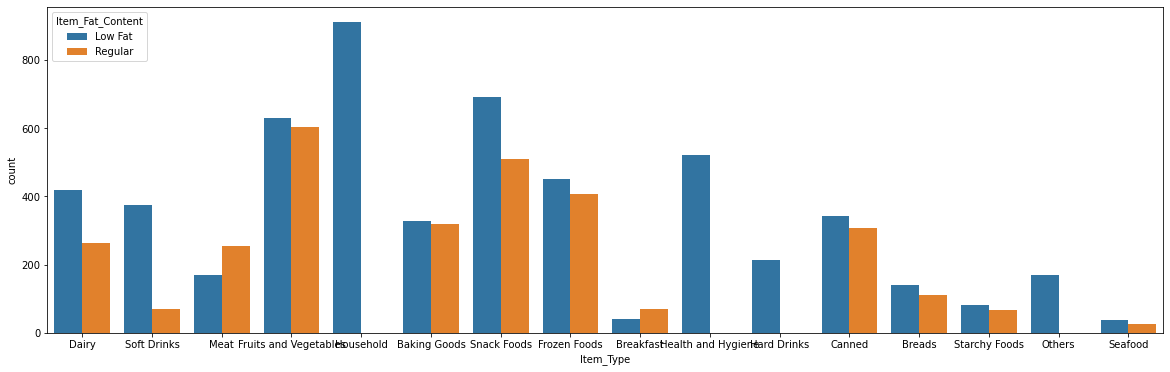

In [15]:
plt.figure(figsize=(20,6))
sns.countplot(df['Item_Type'],hue=df['Item_Fat_Content'])

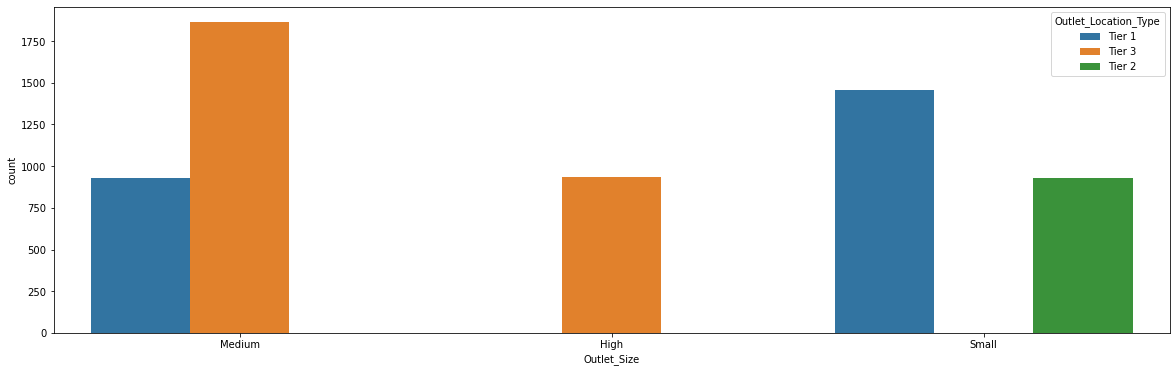

In [16]:
plt.figure(figsize=(20,6))
sns.countplot(df['Outlet_Size'],hue=df['Outlet_Location_Type'])

From above we can conclude that as we go in urban and sub urban area the outlet size is high and meadium and small for village. that proves our assumption for Tier are right. i.e. [Tier 1= Sub Urban, Tier 2= Village, Tier 3= Urban]

In [17]:
df.groupby(['Item_Weight'])['Item_Outlet_Sales'].sum()

Item_Weight
4.555      7046.8272
4.590      6338.4160
4.610     13955.1680
4.615     16312.1000
4.635     10922.4490
             ...    
21.000     7168.6686
21.100    31475.0292
21.200    13818.6790
21.250    52780.6292
21.350    23740.4306
Name: Item_Outlet_Sales, Length: 415, dtype: float64

In [18]:
df.groupby(['Item_Type'])['Item_Outlet_Sales'].sum()

Item_Type
Baking Goods             1.265525e+06
Breads                   5.532372e+05
Breakfast                2.322990e+05
Canned                   1.444151e+06
Dairy                    1.522594e+06
Frozen Foods             1.825735e+06
Fruits and Vegetables    2.820060e+06
Hard Drinks              4.577934e+05
Health and Hygiene       1.045200e+06
Household                2.055494e+06
Meat                     9.175656e+05
Others                   3.255176e+05
Seafood                  1.488682e+05
Snack Foods              2.732786e+06
Soft Drinks              8.928977e+05
Starchy Foods            3.514013e+05
Name: Item_Outlet_Sales, dtype: float64

The sale for Meat, soft drinks, Breads, hard drinks are much higher


In [19]:
df.groupby(['Outlet_Type'])['Item_Outlet_Sales'].sum()

Outlet_Type
Grocery Store        3.680343e+05
Supermarket Type1    1.291734e+07
Supermarket Type2    1.851823e+06
Supermarket Type3    3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

sales in Grocery Store and Supermarket Type3 are comparitively high

In [20]:
df.groupby(['Outlet_Establishment_Year'])['Item_Outlet_Sales'].sum()

Outlet_Establishment_Year
1985    3.633620e+06
1987    2.142664e+06
1997    2.118395e+06
1998    1.883402e+05
1999    2.183970e+06
2002    2.036725e+06
2004    2.268123e+06
2007    2.167465e+06
2009    1.851823e+06
Name: Item_Outlet_Sales, dtype: float64

As we can see more the older store sales from those stores are higher

In [21]:

df.groupby(['Item_Visibility'])['Item_Outlet_Sales'].sum()

Item_Visibility
0.000000    1.169058e+06
0.003575    3.229796e+03
0.003589    1.691798e+03
0.003598    2.922196e+03
0.003599    3.075996e+03
                ...     
0.309390    1.384864e+02
0.311090    1.544656e+02
0.321115    1.997400e+02
0.325781    7.610094e+02
0.328391    5.885672e+02
Name: Item_Outlet_Sales, Length: 7880, dtype: float64

As we can see more the visibility of product higher the sales for that products

In [22]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Handling Missing Data

In [23]:
df.isnull().sum()/df.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [24]:
df['Item_Weight'].mean()

12.857645184136183

In [25]:
item_weight_mean= df.pivot_table(values='Item_Weight',index='Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [26]:
miss_value= df['Item_Weight'].isnull()
miss_value

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [27]:
for i, item in enumerate(df['Item_Identifier']):
    if miss_value[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i]=item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i]=np.mean(df['Item_Weight'])

<ipython-input-27-77a44f1455ca>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Weight'][i]=np.mean(df['Item_Weight'])


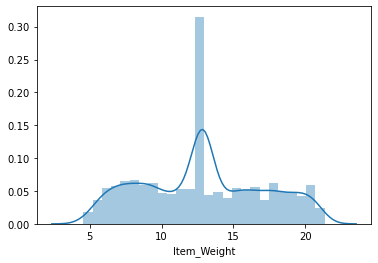

In [28]:
sns.distplot(df['Item_Weight'])

Filling the missing values with mean, as distribution of data looks symmetrical

#### Outlet_Size having almost 30 % of missing values, so it is inconveniet to fll those value with mode. So we fill those with another category i.e. 'Missing'

In [29]:
outlet_size_mode=df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [30]:
miss_value_cat = df['Outlet_Size'].isnull()
df.loc[miss_value_cat,'Outlet_Size'] = df.loc[miss_value_cat,'Outlet_Type'].apply(lambda x:outlet_size_mode[x])


In [31]:
# Item_Visibility has most of record zero, so we fill those with the mean of that feature
sum(df['Item_Visibility']==0)

526

In [32]:
df.loc[:,"Item_Visibility"].replace([0],[df['Item_Visibility'].mean()],inplace=True)

In [33]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Creating New Feature


In [34]:
df['New_Item_Type']=df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [35]:
df['New_Item_Type']=df['New_Item_Type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [36]:
df.loc[df['New_Item_Type'] =='Non-Consumable','Item_Fat_Content']='Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [37]:
# Creating new feature based od outlet year
df['Outlet_years']=2013-df['Outlet_Establishment_Year']   # as the dataset is capture on 2013

In [38]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


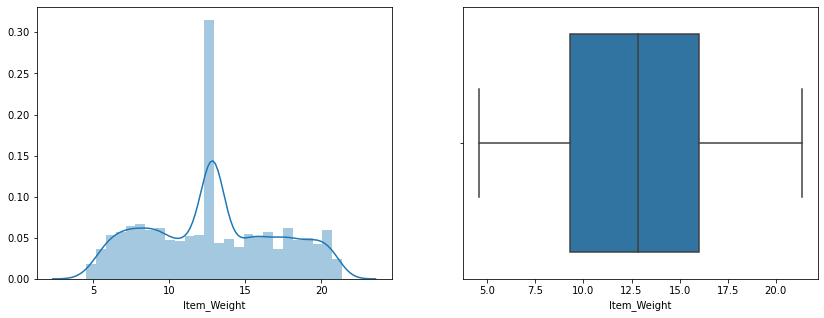

In [39]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(df['Item_Weight'])
plt.subplot(1,2,2)
sns.boxplot(df['Item_Weight'])

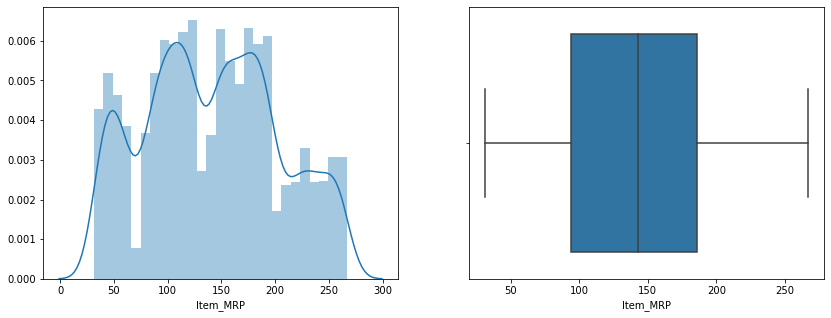

In [40]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(df['Item_MRP'])
plt.subplot(1,2,2)
sns.boxplot(df['Item_MRP'])

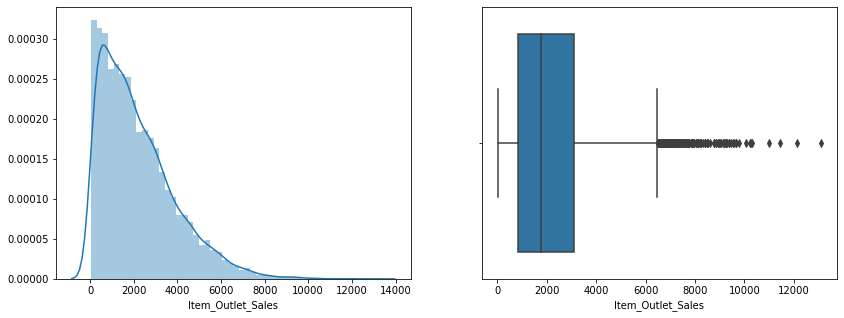

In [41]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(df['Item_Outlet_Sales'])
plt.subplot(1,2,2)
sns.boxplot(df['Item_Outlet_Sales'])

In [42]:
df['Item_Outlet_Sales']=np.log1p(df['Item_Outlet_Sales'])

## ----------------------------------------------------------------------------------------------------------------------------------

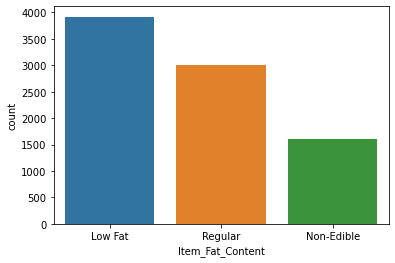

In [43]:
sns.countplot(df['Item_Fat_Content'])

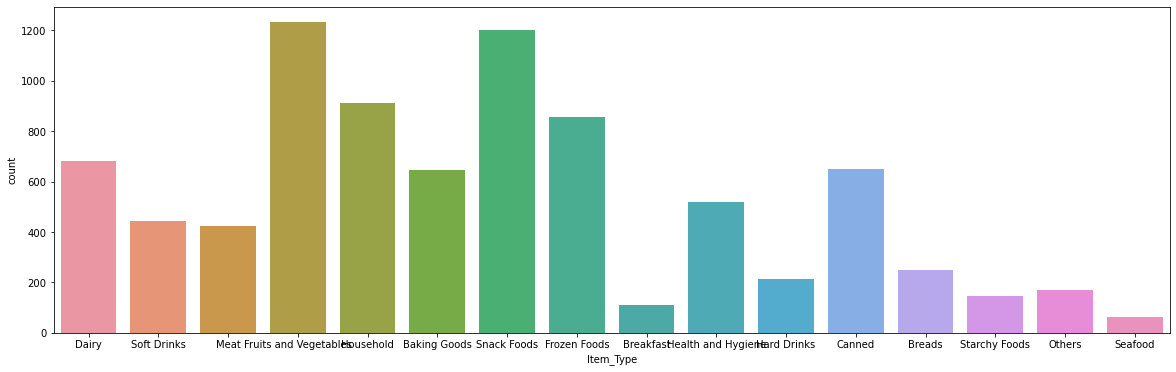

In [44]:
plt.figure(figsize=(20,6))
sns.countplot(df['Item_Type'])

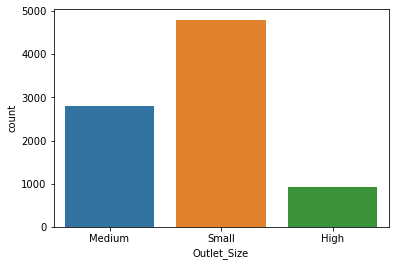

In [45]:
sns.countplot(df['Outlet_Size'])

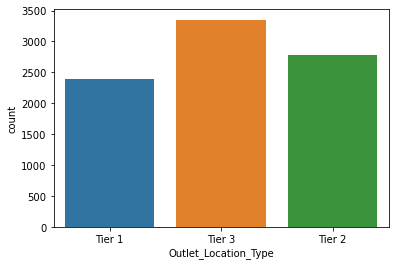

In [46]:
sns.countplot(df['Outlet_Location_Type'])

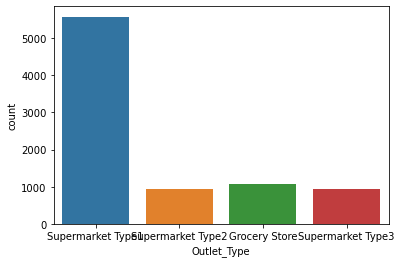

In [47]:
sns.countplot(df['Outlet_Type'])

### Checking corelation

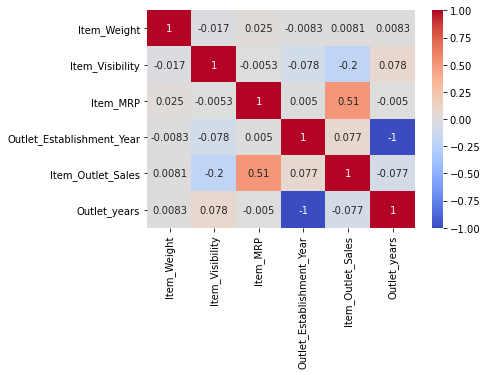

In [48]:
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [49]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,26


###  Handling categorical data

In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Outlet']=le.fit_transform(df['Outlet_Identifier'])
cat_col=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','New_Item_Type']
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [51]:
X=df.drop(columns=['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
y=df['Item_Outlet_Sales']

In [52]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_years,Outlet
0,9.30,0,0.016047,4,249.8092,1,0,1,1,14,9
1,5.92,2,0.019278,14,48.2692,1,2,2,0,4,3
2,17.50,0,0.016760,10,141.6180,1,0,1,1,14,9
3,19.20,2,0.066132,6,182.0950,2,2,0,1,15,0
4,8.93,1,0.066132,9,53.8614,0,2,1,2,26,1


In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=101)

In [54]:
x_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_years,Outlet
5274,15.100000,2,0.067021,13,260.3304,0,2,1,1,26,1
2697,16.250000,0,0.145913,4,95.4410,2,2,0,1,15,0
1976,12.857645,1,0.068754,9,127.9678,2,0,0,2,28,4
5139,12.857645,0,0.110736,0,35.2874,1,2,3,1,28,5
8073,16.200000,0,0.103634,3,101.3990,1,0,1,1,14,9


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
lr=LinearRegression()
cv=cross_val_score

In [56]:
lr.fit(x_train,y_train)

LinearRegression()

In [57]:
y_pred=lr.predict(x_test)

In [58]:
from sklearn.metrics import r2_score 

In [59]:
r2_score(y_test,y_pred)

0.5835467302227317

In [60]:
cv(lr,X,y).mean()

0.5781625339129872

In [61]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [62]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [63]:
y_pred=rf.predict(x_test)

In [64]:
r2_score(y_test,y_pred)

0.7038953176846795

In [65]:
cv(rf,X,y).mean()

0.6982457034048279

### Fine Tunning the model

In [66]:
from sklearn.model_selection import RandomizedSearchCV
param={'n_estimators':range(10,100,5),
      'criterion':['mse', 'mae'],
      'max_depth':range(2,10,1),
      'min_samples_split':range(2,8,1),
      'min_samples_leaf':range(2,6,1),
      'max_features':['auto', 'sqrt', 'log2']}
rf_reg =RandomizedSearchCV(rf,param,n_iter=10,n_jobs=-1,cv=5,verbose=3,random_state=101)

In [67]:
rf_reg.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': range(2, 10),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(2, 6),
                                        'min_samples_split': range(2, 8),
                                        'n_estimators': range(10, 100, 5)},
                   random_state=101, verbose=3)

In [68]:
rf_reg.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_leaf=4, n_estimators=80)

In [69]:
y_pred=rf_reg.predict(x_test)

In [70]:
r2_score(y_test,y_pred)

0.7303528589087197

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.4064911960063646
0.28109627510322116


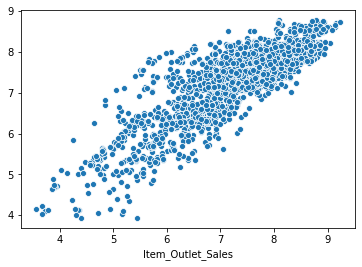

In [72]:
sns.scatterplot(y_test,y_pred)

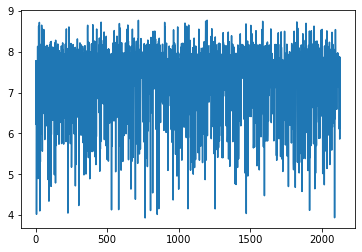

In [73]:
plt.plot(y_pred)


In [75]:
import pickle
pickle_out=open('Sales.pkl','wb')
pickle.dump(rf_reg,pickle_out)
pickle_out.close()
